# **Working memory training**: correlating behavioral variability with recruitment


In [1]:
library("tidyverse")

theme_training <- theme_bw() + theme(axis.text.y = element_text(size=25, colour='#262626ff'),
          axis.text.x = element_text(size=25, colour='#262626ff'),
          axis.title.y = element_text(size=25, colour='#262626ff'),
          axis.title.x  = element_text(size=25, colour='#262626ff'),
          plot.title = element_text(hjust=0.5, size=25),
          panel.grid.major = element_blank(), 
          panel.grid.minor = element_blank(),
          axis.line = element_line(colour="#262626ff"),
          panel.border = element_rect(colour = "#262626ff", fill=NA, size=1.8),
          panel.background = element_rect(fill="transparent",colour=NA),
          plot.background = element_rect(fill="transparent",colour=NA),
          legend.key = element_rect(fill= "transparent", colour="transparent"),
          strip.background =element_rect(fill="transparent", colour=NA),
          strip.text = element_text(size=25),
          axis.ticks = element_line(colour="#262626ff", size=1, 2),
          axis.ticks.length = unit(.15, "cm"),
          aspect.ratio = 1,
          )

setwd("~/Dropbox/Projects/LearningBrain/")

performance_variability <- read.csv('data/behavioral/WM_fmri_behaviour_variability_tidy.csv')
networks_recruitment <- read.csv('data/neuroimaging/03-modularity/dynamic/04-recruitment_integration//whole-brain_power_normalized_recruitment_tidy.csv')

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.0.0     ✔ purrr   0.2.5
✔ tibble  1.4.2     ✔ dplyr   0.7.6
✔ tidyr   0.8.1     ✔ stringr 1.3.1
✔ readr   1.1.1     ✔ forcats 0.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [2]:
head(networks_recruitment)

Subject,Session,Group,Network,Recruitment
sub-01,Naive,Control,AU,1.116162
sub-01,Naive,Control,CER,1.221085
sub-01,Naive,Control,CO,1.135295
sub-01,Naive,Control,DA,1.081438
sub-01,Naive,Control,DM,1.092354
sub-01,Naive,Control,FP,1.273885


In [3]:
head(performance_variability)

Subject,Session,Accuracy_std,pRT_std,Dprime_std,Group
sub-01,Naive,0.14409680,247.9006,0.8829726,Control
sub-01,Naive,0.10000000,210.0876,0.5344575,Control
sub-01,Early,0.13844373,183.4413,0.7998220,Control
sub-01,Early,0.11666667,155.0257,0.8416775,Control
sub-02,Middle,0.19913005,238.7242,1.1430880,Control
sub-02,Middle,0.08164966,160.8744,0.5703609,Control


In [2]:
dualnback_exclude = c('sub-13', 'sub-21', 'sub-23', 'sub-50') # higly motion subjects in one of four sessions

performance_variability <- performance_variability %>% filter(!(Subject %in% dualnback_exclude))
networks_recruitment <- networks_recruitment %>% filter(!(Subject %in% dualnback_exclude)) 

In [3]:
performance_variability_diff <- performance_variability[performance_variability$Session=='Naive',] - 
                                performance_variability[performance_variability$Session=='Early',]

Warning message in Ops.factor(left, right):
“‘-’ not meaningful for factors”Warning message in Ops.factor(left, right):
“‘-’ not meaningful for factors”Warning message in Ops.factor(left, right):
“‘-’ not meaningful for factors”

[1] "AU"

	Pearson's product-moment correlation

data:  performance_variability_diff$Dprime_std and recruitment_diff
t = 0.55517, df = 40, p-value = 0.5819
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.2223980  0.3812431
sample estimates:
     cor 
0.087444 


	Pearson's product-moment correlation

data:  performance_variability_diff$Dprime_std and recruitment_diff
t = 0.55517, df = 40, p-value = 0.5819
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.2223980  0.3812431
sample estimates:
     cor 
0.087444 

[1] "CER"

	Pearson's product-moment correlation

data:  performance_variability_diff$Dprime_std and recruitment_diff
t = 0.074755, df = 40, p-value = 0.9408
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.2931654  0.3146202
sample estimates:
       cor 
0.01181904 


	Pearson's product-moment correlation

data:  performance_variability_diff$

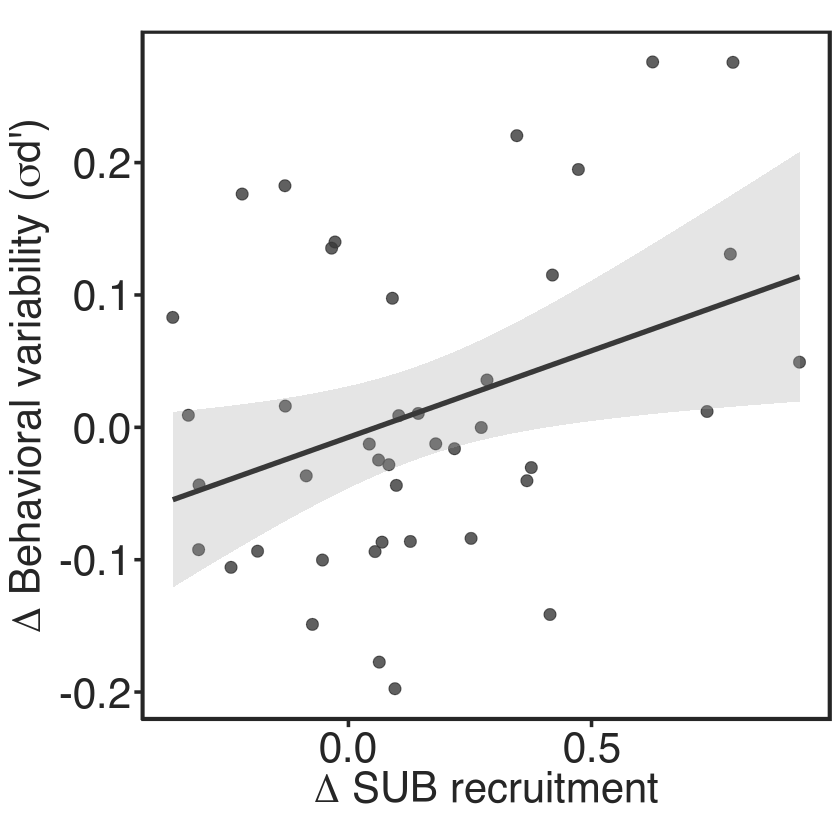

[1] "UNC"

	Pearson's product-moment correlation

data:  performance_variability_diff$Dprime_std and recruitment_diff
t = -0.29908, df = 40, p-value = 0.7664
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.3461966  0.2604349
sample estimates:
        cor 
-0.04723538 


	Pearson's product-moment correlation

data:  performance_variability_diff$Dprime_std and recruitment_diff
t = -0.29908, df = 40, p-value = 0.7664
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.3461966  0.2604349
sample estimates:
        cor 
-0.04723538 

[1] "VA"

	Pearson's product-moment correlation

data:  performance_variability_diff$Dprime_std and recruitment_diff
t = -0.14478, df = 40, p-value = 0.8856
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.3245598  0.2830139
sample estimates:
        cor 
-0.02288603 


	Pearson's product-moment correlation

data:  performance_v

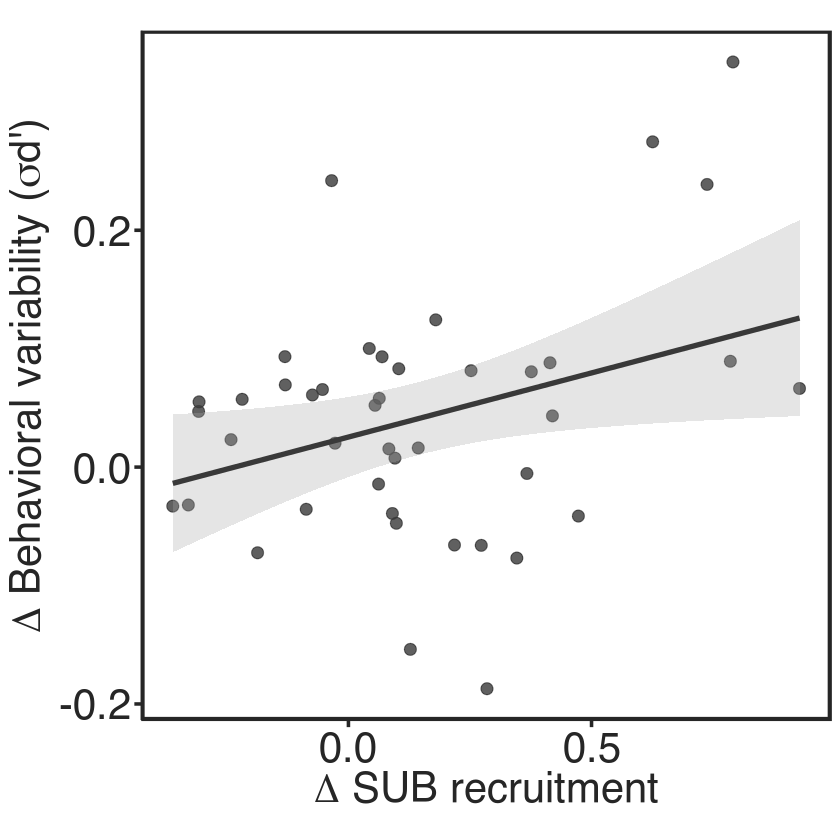

In [6]:
unique_networks = unique(networks_recruitment$Network)

for (i in unique_networks){
    
    naive <- networks_recruitment %>% filter(Network==i) %>% filter(Session=='Naive')
    early <- networks_recruitment %>% filter(Network==i) %>% filter(Session=='Early')
    
    recruitment_diff <- early$Recruitment - naive$Recruitment
    print(i)
    #print(cor.test(performance_variability_diff$pRT_std, recritment_diff))
    
    recr_beh <- data.frame(cbind(performance_variability_diff$Dprime_std, recruitment_diff))
    results <- print(cor.test(performance_variability_diff$Dprime_std, recruitment_diff))
    colnames(recr_beh)[1] <- 'beh_var'
    print(results)
    
        if (results$p.value < 0.05){
        
            p <- recr_beh %>% ggplot(aes(beh_var , recruitment_diff)) +
            geom_point(size = 3, alpha = 0.8, col = '#393939') +
            geom_smooth(method='lm', col = '#393939', fill = 'darkgrey', size = 1.5, alpha = 0.3) +
            theme_training +
            ylab(expression(paste(Delta," Behavioral variability (", sigma, "d')"))) +
            xlab(expression(paste(Delta, ' Recruitment'))) 
            #ggtitle('All subjects')
            print(p)
        }
}
     